# **Prevendo a Qualidade do Vinho Tinto**

**Objetivo:**
* Construir um modelo de Machine Learning capaz de prever a qualidade do vinho tinto.

### **1. Introdução**

<p align="justify">
Neste projeto, utilizando técnicas de análise de dados e aprendizado de máquina, nosso objetivo é criar um modelo preditivo capaz de avaliar a qualidade do vinho com precisão, considerando parâmetros como teor alcoólico, acidez, concentração de açúcar e outros fatores determinantes. Utilizaremos o PyCaret para escolha do modelo que melhor se adequa ao conjunto de dados.

In [ ]:
# Carregando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
sns.set()

In [ ]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Ciência de Dados com Python/Projetos/Dados/winequality-red.csv', sep = ';')

In [ ]:
# Visualizando dados

dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **2. Análise Exploratória de Dados**

In [ ]:
# Informações sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Verificando a existência de dados faltantes

dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Descritiva dos dados

dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**OBS 1:** a menor nota atribuida a qualidade de um vinho é 3 e a maior é 8.

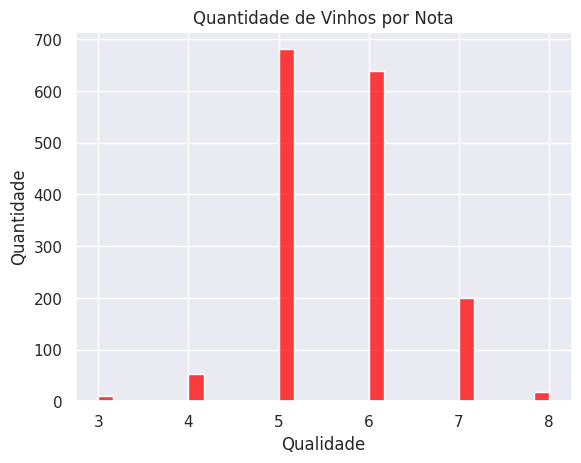

In [ ]:
# Visualizando distribição das "classes"

## Configurando gráfico
sns.histplot(data = dados,
            x = 'quality',
            color = 'red')

## Configurando labels e título do gráfico
plt.title('Quantidade de Vinhos por Nota')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

## Plotando gráfico
plt.show();

**OBS 2:** a maior quantidade de vinhos são classificados entre as notas 5 e 7;

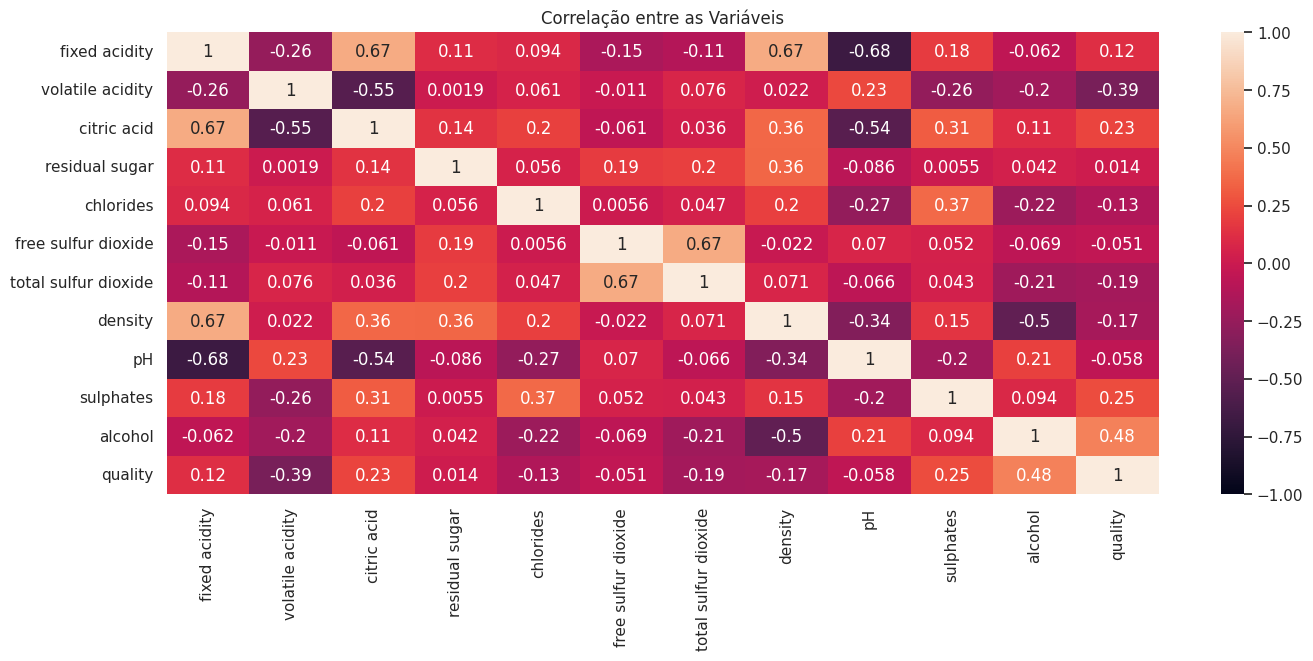

In [ ]:
# Verificando a correlação entre as variáveis

## Definindo tamanho da figura
plt.figure(figsize = (16, 6))

## Configurando gráfico
sns.heatmap(dados.corr(),
            vmin = -1,
            vmax = 1,
            annot = True)

## Definindo título do gráfico
plt.title('Correlação entre as Variáveis')

## Plotando gráfico
plt.show()

**OBS 3:** as variáveis alcohol, sulphates e citric acid tem uma forte correção com a qualidade do vinho.

### **3. Pré-Processamento de Dados**

In [ ]:
# Separando os dados em previsores e classe

previsores = dados.drop('quality', axis = 1)
classe = dados['quality']

In [ ]:
# Verificando shape dos dados

print(previsores.shape)
print(classe.shape)

(1599, 11)
(1599,)


In [ ]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(previsores,
                                                        classe,
                                                        test_size = 0.3,
                                                        random_state = 0)

In [ ]:
# Verificando shape dos dados

print(X_treino.shape)
print(y_treino.shape)
print(X_teste.shape)
print(y_teste.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


### **4. Construindo o Modelo**

**4.1 Definindo modelo a ser usado com o PyCaret**

In [ ]:
# Instalando biblioteca

!pip install pycaret

In [ ]:
# Carregando biblioteca

from pycaret.classification import *

In [ ]:
# Escolhendo o algoritmo mais adequado para o estudo

clf = setup(dados, target = "quality", session_id = 123)
compare_models()

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6702,0.5871,0.6702,0.6485,0.6494,0.4612,0.4667,0.4660
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.5320
rf,Random Forest Classifier,0.6595,0.5761,0.6595,0.6323,0.6388,0.4444,0.4500,0.4780
lightgbm,Light Gradient Boosting Machine,0.6497,0.5725,0.6497,0.6277,0.6342,0.4365,0.4403,1.8880
gbc,Gradient Boosting Classifier,0.6336,0.5463,0.6336,0.6173,0.6219,0.4151,0.4173,1.6850
lr,Logistic Regression,0.6032,0.5297,0.6032,0.5717,0.5746,0.3422,0.3483,2.1930
lda,Linear Discriminant Analysis,0.5987,0.5329,0.5987,0.5806,0.5845,0.3558,0.3586,0.0650
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.4973,0.5318,0.2989,0.3103,0.0560
dt,Decision Tree Classifier,0.5872,0.4659,0.5872,0.5837,0.5821,0.3556,0.3572,0.1050
nb,Naive Bayes,0.5558,0.5033,0.5558,0.5628,0.5551,0.3141,0.3162,0.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**OBS 4:** a partir dos resultados obtidos utilizando o PyCaret, o melhor modelo a ser utilizado é o Extra Tree Classifier.

**4.2 Construindo modelo**

In [ ]:
# Carregando biblioteca

from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Instânciando modelo

modelo = ExtraTreesClassifier()

In [ ]:
# Treinando o modelo

modelo.fit(X_treino, y_treino)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [ ]:
# Aplicando aos dados de teste

y_predito = modelo.predict(X_teste)

### **5. Avaliando Modelo**

In [ ]:
# Métricas do Modelo

print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.74      0.78      0.76       208
           6       0.69      0.72      0.70       204
           7       0.56      0.56      0.56        45
           8       0.00      0.00      0.00         5

    accuracy                           0.70       480
   macro avg       0.33      0.34      0.34       480
weighted avg       0.66      0.70      0.68       480



### **6. Considerações Finais**

<p align="justify">
Nesse estudo, se fez uso do PyCaret para selecionar o melhor modelo que se adequava ao conjunto de dados. O escolhido foi o Extra Tree Classifier. Feito isso, foi realizado o treinamento do mesmo e em seguida aplicado aos dados de teste, realizando assim previsões para em seguida ser feita uma avaliação de desempenho do modelo. A métricas utilizadas para avaliação foram precision, recall, f1-score e accuracy. No geral, o modelo apresenta resultados animadores, entretando somente para os vinhos classificados entre as notas 5 e 7. Analisando as métricas, pode-se verificar que o número de dados (vinhos) por cada classe (notas) é importante para o modelo, ou seja, é necessário um considerável número de dados por classe para que o mesmo consiga identificar os padrões e assim realizar a classificação. A partir disso, considera-se para estudos futuros a aplicação de algumas técnicas na etapa de pré-processamento dos dados e na construção do modelo, como o balanceamento de classes.